# Google Play Store

**Problem Statement:**
Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will
manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated
games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the
potential.


**Analysis to be done:**
The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers,
are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

**Data Dictionary:**

Variables Description

App Application name

Category Category to which the app belongs

Rating Overall user rating of the app

Reviews Number of user reviews for the app

Size Size of the app

Installs Number of user downloads/installs for the app

Type Paid or Free

Price Price of the app

Content Rating Age group the app is targeted at - Children / Mature 21+ / Adult

Genres An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres

Last Updated Date when the app was last updated on Play Store

Current Ver Current version of the app available on Play Store

Android Ver Minimum required Android version

In [946]:
# Importing Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import OLS

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [813]:
df = pd.read_csv("googleplaystore.csv")

In [814]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [815]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [816]:
df.shape

(10841, 13)

In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [818]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [819]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Missing Value Treatment:

In [820]:
df.isna().sum() / len(df) * 100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content_Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [821]:
# As Rating is Our target Variable, we cannot fill in missing values for Rating.

# All other features have very small amount of Mussing values in it.

# Hence, we can drop all rows having Missing Values.

In [822]:
df= df.dropna(how= "any", axis= 0)

In [823]:
df.shape

(9360, 13)

In [824]:
df.isna().sum() / len(df) * 100

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content_Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [825]:
# All Misiing Values are treated.

### Data Cleaning:

In [826]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [827]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [828]:
# we can Delete "App", "Last Updated", "Current Ver" and "Android Ver" columns as they are not useful for Rating Prediction

df = df.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis= 1)

In [829]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity


In [830]:
df.tail()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
10834,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature_17+,Books_&_Reference
10840,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle


In [831]:
# For "Size" Column:

df["Size"].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [832]:
# "Size" columns has values with "M" and "K" joined to it.

# Here, "M" means Means 1000000 Bytes and "k" means 1000 Bytes.

# We need to remove "M" and "K" from "Size" column values and replace it with appropriate values.

In [833]:
df["Size"] = df["Size"].apply(lambda size : float(size.split("M")[0]) * 1000000 if "M" in size else 
                 (float(size.split("k")[0]) * 1000) if "k" in size else None)

In [834]:
df["Size"]

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10834     2600000.0
10836    53000000.0
10837     3600000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 9360, dtype: float64

In [835]:
# Looks Like Some apps didnt have Size Specified in Numbers.

df["Size"].isna().sum()

1637

In [836]:
# we can Fill This Missing Values with "ffill" method.
df["Size"] = df["Size"].fillna(method= "ffill")

In [837]:
df["Size"].isna().sum()

0

In [838]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art_&_Design
3,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art_&_Design
4,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art_&_Design_Creativity


In [839]:
# For "Installs" column:

df["Installs"]

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9360, dtype: object

In [840]:
# Every Value has "+" and "," attached to it.

# We can simply replace that "+" and "," and convert it into Integer or Float.

In [841]:
df["Installs"].apply(lambda installs : int(installs.replace("+" , "").replace("," , "")))

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

In [842]:
df["Installs"] = df["Installs"].apply(lambda installs : int(installs.replace("+" , "").replace("," , "")))

In [843]:
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

In [844]:
df.dtypes

Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [845]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art_&_Design
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art_&_Design
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art_&_Design_Creativity


In [846]:
# For Price Column:

df["Price"].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [847]:
# We have to rempve "$" from "Price" values and Convert it into Float.

In [848]:
df["Price"].apply(lambda price : 0 if price == "0" else float(price.replace("$" , "")))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

In [849]:
df["Price"] = df["Price"].apply(lambda price : 0 if price == "0" else float(price.replace("$" , "")))

In [850]:
df["Price"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

In [851]:
df.dtypes

Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

In [852]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art_&_Design
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art_&_Design
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity


In [853]:
# For "Reviews" column:

df["Reviews"].value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
666521     1
342912     1
4272       1
5517       1
398307     1
Name: Reviews, Length: 5990, dtype: int64

In [854]:
# We can Converr "Reviews" to Integer Data.

df["Reviews"].astype("int32")

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int32

In [855]:
df["Reviews"] = df["Reviews"].astype("float")

In [856]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art_&_Design
3,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art_&_Design
4,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity


In [857]:
df.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

In [858]:
# Checking if Any Free applications have Price > 0:

df[(df["Price"] > 0) & (df["Type"] == "Free")]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres


In [859]:
# Checking if Any Applications have "Reviews" more than "Installs":

df[df["Reviews"] > df["Installs"]]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
2454,MEDICAL,5.0,4.0,25000000.0,1,Free,0.00,Everyone,Medical
4663,LIFESTYLE,4.8,10249.0,30000000.0,10000,Paid,2.49,Everyone,Lifestyle
5917,GAME,5.0,2.0,20000000.0,1,Paid,1.49,Everyone,Arcade
6700,GAME,5.0,7.0,19000000.0,5,Free,0.00,Everyone,Arcade
7402,GAME,5.0,11.0,6100000.0,10,Free,0.00,Everyone,Arcade
8591,SOCIAL,5.0,20.0,4200000.0,10,Free,0.00,Teen,Social
10697,GAME,5.0,2.0,16000000.0,1,Paid,0.99,Everyone,Arcade


In [860]:
# We have 7 Rows with Number of reviews More than Number of Installs.
# We should drop these Rows.

In [861]:
df = df.drop((df[df["Reviews"] > df["Installs"]]).index, axis= 0)

In [862]:
df[df["Reviews"] > df["Installs"]]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres


In [863]:
# Checking if any Application has Rating More than 5:

df["Rating"].value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     268
3.7     239
4.8     233
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

### Distribution and Outliers Treatment:

In [864]:
df.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

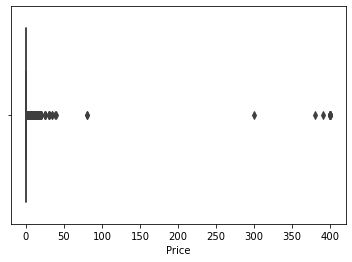

In [865]:
# Price:

sns.boxplot(df["Price"])

plt.show()

In [866]:
# There Seems to be some Applications with Very High Price:

df[df["Price"] > 100]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
4197,FAMILY,4.3,6.0,1500000.0,100,Paid,399.99,Everyone,Entertainment
4362,LIFESTYLE,3.8,718.0,26000000.0,10000,Paid,399.99,Everyone,Lifestyle
4367,LIFESTYLE,3.6,275.0,7300000.0,10000,Paid,400.00,Everyone,Lifestyle
5351,LIFESTYLE,3.8,3547.0,1800000.0,100000,Paid,399.99,Everyone,Lifestyle
5354,FAMILY,4.0,856.0,8700000.0,10000,Paid,399.99,Everyone,Entertainment
5355,LIFESTYLE,3.8,411.0,2600000.0,10000,Paid,299.99,Everyone,Lifestyle
5356,FINANCE,4.1,1867.0,4700000.0,50000,Paid,399.99,Everyone,Finance
5357,LIFESTYLE,2.9,41.0,2900000.0,1000,Paid,379.99,Everyone,Lifestyle
5358,FINANCE,3.8,93.0,22000000.0,1000,Paid,399.99,Everyone,Finance
5359,FINANCE,3.5,472.0,965000.0,5000,Paid,399.99,Everyone,Finance


In [867]:
# There are 15 Observations which have Price greater than 100.

# We can drop these Rows as they are outliers.

df = df.drop((df[df["Price"] > 100]).index, axis= 0)

In [868]:
df.shape

(9338, 9)

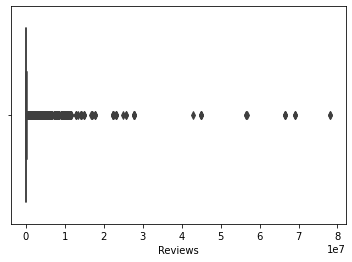

In [869]:
# Reviews:

sns.boxplot(df["Reviews"])

plt.show()

In [870]:
# There Seems to be some Applications with Very High number of Reviews:

df[df["Reviews"] > 3000000]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
335,COMMUNICATION,4.0,56642847.0,35000000.0,1000000000,Free,0.0,Everyone,Communication
336,COMMUNICATION,4.4,69119316.0,35000000.0,1000000000,Free,0.0,Everyone,Communication
338,COMMUNICATION,4.3,9642995.0,17000000.0,1000000000,Free,0.0,Everyone,Communication
340,COMMUNICATION,4.3,4604324.0,17000000.0,1000000000,Free,0.0,Everyone,Communication
341,COMMUNICATION,4.0,3419249.0,17000000.0,1000000000,Free,0.0,Everyone,Communication
...,...,...,...,...,...,...,...,...,...
8894,TOOLS,4.5,12759815.0,15000000.0,100000000,Free,0.0,Everyone,Tools
8896,TOOLS,4.5,13479633.0,14000000.0,100000000,Free,0.0,Everyone,Tools
9142,GAME,4.4,3344300.0,22000000.0,50000000,Free,0.0,Everyone_10+,Racing
10186,FAMILY,4.4,7615646.0,71000000.0,100000000,Free,0.0,Everyone,Casual


In [871]:
# There are 355 Observations which have Price greater than 3000000.

# We can drop these Rows as they are outliers.

df = df.drop(df[df["Reviews"] > 3000000].index, axis= 0)

In [872]:
df.shape

(8983, 9)

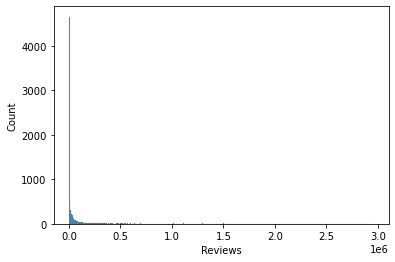

In [873]:
# Reviews:

sns.histplot(df["Reviews"])

plt.show()

In [874]:
# Applying Log Transformation on "Reviews":

df["Reviews"] = df["Reviews"].apply(np.log1p)

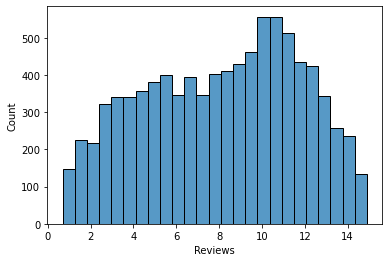

In [875]:
# Reviews:

sns.histplot(df["Reviews"])

plt.show()

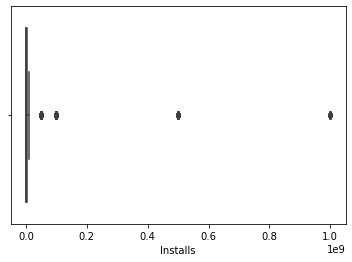

In [876]:
# Installs:

sns.boxplot(df["Installs"])

plt.show()

In [877]:
# There Seems to be some Applications with Very High Number of Installs.

df[df["Installs"] > df["Installs"].quantile(0.99)]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
152,BOOKS_AND_REFERENCE,3.9,14.175444,5000000.0,1000000000,Free,0.0,Teen,Books_&_Reference
371,COMMUNICATION,4.6,14.549434,37000000.0,500000000,Free,0.0,Everyone,Communication
3127,TRAVEL_AND_LOCAL,4.2,14.571487,14000000.0,1000000000,Free,0.0,Everyone,Travel_&_Local
3232,TRAVEL_AND_LOCAL,4.2,14.571495,28000000.0,1000000000,Free,0.0,Everyone,Travel_&_Local
3265,TOOLS,4.2,14.435612,15000000.0,500000000,Free,0.0,Everyone,Tools
3326,TOOLS,4.2,14.435608,8900000.0,500000000,Free,0.0,Everyone,Tools
3450,PRODUCTIVITY,4.5,14.549861,6100000.0,500000000,Free,0.0,Everyone,Productivity
3454,PRODUCTIVITY,4.4,14.820241,24000000.0,1000000000,Free,0.0,Everyone,Productivity
3473,PRODUCTIVITY,4.4,14.436792,61000000.0,500000000,Free,0.0,Everyone,Productivity
3476,PRODUCTIVITY,4.2,13.662603,1600000.0,500000000,Free,0.0,Everyone,Productivity


In [878]:
# we can Drop These Rows.

df = df.drop((df[df["Installs"] > df["Installs"].quantile(0.99)]).index, axis= 0 )

In [879]:
df.shape

(8952, 9)

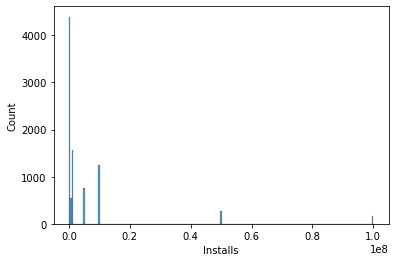

In [880]:
# Installs:

sns.histplot(df["Installs"])

plt.show()

In [881]:
# Applying Log Transformation on "Installs":

df["Installs"] = df["Installs"].apply(np.log1p)

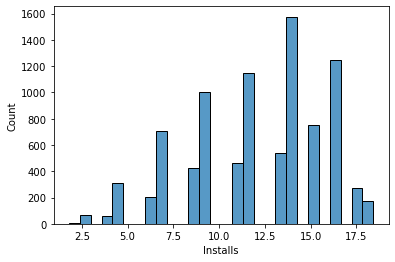

In [882]:
# Installs:

sns.histplot(df["Installs"])

plt.show()

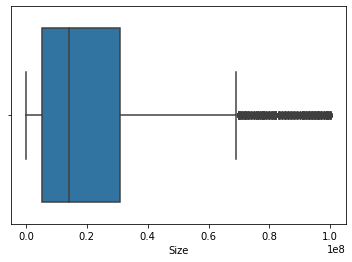

In [883]:
# Size:

sns.boxplot(df["Size"])

plt.show()

In [884]:
# There seems to be many Applications with large Sizes.

df[df["Size"] > df["Size"].quantile(0.99)]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
748,EDUCATION,4.4,10.949015,97000000.0,13.815512,Free,0.0,Everyone,Education_Brain_Games
1080,FINANCE,4.5,11.009572,100000000.0,13.815512,Free,0.0,Everyone,Finance
1522,LIBRARIES_AND_DEMO,4.6,6.291569,99000000.0,10.819798,Free,0.0,Everyone,Libraries_&_Demo
1565,LIFESTYLE,4.0,11.856487,100000000.0,16.118096,Free,0.0,Everyone,Lifestyle_Pretend_Play
1671,GAME,4.3,13.815928,98000000.0,17.727534,Free,0.0,Teen,Action
...,...,...,...,...,...,...,...,...,...
9533,FAMILY,4.6,10.803872,99000000.0,13.815512,Free,0.0,Everyone_10+,Role_Playing
9677,FAMILY,4.6,10.820998,98000000.0,13.815512,Free,0.0,Everyone,Puzzle_Brain_Games
10100,GAME,4.4,13.121331,99000000.0,16.118096,Free,0.0,Teen,Adventure
10345,AUTO_AND_VEHICLES,3.9,3.135494,97000000.0,6.908755,Free,0.0,Everyone,Auto_&_Vehicles


In [885]:
# we can drop these rows

df = df.drop((df[df["Size"] > df["Size"].quantile(0.99)].index), axis= 0)

In [886]:
df.shape

(8875, 9)

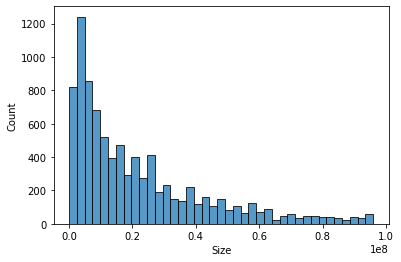

In [887]:
# Size

sns.histplot(df["Size"])

plt.show()

In [888]:
# Applying sqrt Transformation on "Size":

df["Size"] = df["Size"].apply(np.sqrt)

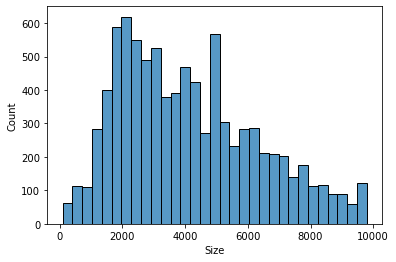

In [889]:
# Size

sns.histplot(df["Size"])

plt.show()

In [890]:
df.shape

(8875, 9)

In [891]:
df["Price"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 8875, dtype: float64

### Dummy Variables for Categorical Columns:

In [892]:
df.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

In [894]:
df = pd.get_dummies(df, drop_first= True)

In [895]:
df.shape

(8875, 156)

In [896]:
df.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=156)

In [897]:
df.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
0,4.1,5.075174,4358.898944,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,3741.657387,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,2949.576241,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,5000.000000,17.727534,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,1673.320053,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split:

In [898]:
# Features:

x = df.drop("Rating", axis= 1)

In [899]:
x.shape

(8875, 155)

In [900]:
# Target:

y = df["Rating"]

In [901]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [902]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size= 0.3, random_state= 42)

In [903]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6212, 155)
(2663, 155)
(6212,)
(2663,)


### Ordinary Least Sqaures Method (OLS):

In [905]:
ols_model1 = OLS(y_train, x_train)

In [906]:
ols_model1 = ols_model1.fit()

In [907]:
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3672.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):                        0.00
Time:                        11:45:35   Log-Likelihood:                         -4279.6
No. Observations:                6212   AIC:                                      8809.
Df Residuals:                    6087   BIC:                                      9651.
Df Model:                         125                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1734      0.006     27.861      0.000       0.161       0.186
Size                                         -2.629e-06   3.44e-06     -0.764      0.445   -9.38e-06    4.12e-06
Installs                                        -0.1472      0.006    -23.776      0.000      -0.159      -0.135
Price                                           -0.0004      0.003     -0.133      0.894      -0.007       0.006
Category_AUTO_AND_VEHICLES                       1.5326      0.121     12.682      0.000       1.296       1.770
Category_BEAUTY                                  1.6243      0.124     13.065      0.000       1.381       1.868
Category_BOOKS_AND_REFERENCE                     1.5746      0.117     13.433      0.000       1.345       1.804
Category_BUSINESS                                1.4889      0.116     12.801      0.000       1.261       1.717
Category_COMICS                                  1.4696      0.116     12.688      0.000       1.242       1.697
Category_COMMUNICATION                           1.4648      0.117     12.572      0.000       1.236       1.693
Category_DATING                                  1.4032      0.118     11.906      0.000       1.172       1.634
Category_EDUCATION                               2.6386      0.241     10.964      0.000       2.167       3.110
Category_ENTERTAINMENT                           2.5835      0.241     10.735      0.000       2.112       3.055
Category_EVENTS                                  1.6288      0.122     13.386      0.000       1.390       1.867
Category_FAMILY                                  2.6954      0.233     11.554      0.000       2.238       3.153
Category_FINANCE                                 1.4487      0.116     12.468      0.000       1.221       1.676
Category_FOOD_AND_DRINK                          1.4520      0.118     12.259      0.000       1.220       1.684
Category_GAME                                    2.9163      0.231     12.617      0.000       2.463       3.369
Category_HEALTH_AND_FITNESS                      1.5183      0.116     13.044      0.000       1.290       1.746
Category_HOUSE_AND_HOME                          1.4907      0.120     12.457      0.000       1.256       1.725
Category_LIBRARIES_AND_DEMO                      1.5118      0.121     12.490      0.000       1.274       1.749
Category_LIFESTYLE                               1.4737      0.116     12.682      0.000       1.246       1.701
Category_MAPS_AND_NAVIGATION                     1.4233      0.118     12.068      0.000       1.192       1.655
Category_MEDICAL                              

In [909]:
# Lot of Columns have P-Value > 0.05.

# These columns are not required to Predict Ratings.

# We can try Building the Model Without these Columns

In [912]:
ols_model1.pvalues

Reviews                                         6.915758e-161
Size                                             4.450374e-01
Installs                                        1.459975e-119
Price                                            8.938419e-01
Category_AUTO_AND_VEHICLES                       2.128969e-36
                                                    ...      
Genres_Video_Players_&_Editors                   6.761185e-01
Genres_Video_Players_&_Editors_Creativity        9.392754e-01
Genres_Video_Players_&_Editors_Music_&_Video     7.312280e-01
Genres_Weather                                   7.325327e-35
Genres_Word                                      8.274562e-02
Length: 155, dtype: float64

In [913]:
ols_model1.pvalues[ols_model1.pvalues < 0.05]

Reviews                                     6.915758e-161
Installs                                    1.459975e-119
Category_AUTO_AND_VEHICLES                   2.128969e-36
Category_BEAUTY                              1.707170e-38
Category_BOOKS_AND_REFERENCE                 1.452021e-40
                                                ...      
Genres_Tools                                 4.943831e-07
Genres_Tools_Education                       1.141014e-03
Genres_Travel_&_Local                        1.288763e-07
Genres_Travel_&_Local_Action_&_Adventure     1.882380e-03
Genres_Weather                               7.325327e-35
Length: 93, dtype: float64

In [914]:
(ols_model1.pvalues[ols_model1.pvalues < 0.05]).index

Index(['Reviews', 'Installs', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Paid',
       'Content_Rating_Everyone', 'Content_Rating_Everyone_10+',
       'Content_Rating_Mature_17+', 'Content_Ra

In [916]:
significant_cols = list((ols_model1.pvalues[ols_model1.pvalues < 0.05]).index)

In [917]:
len(significant_cols)

93

In [918]:
# Creating a new Dataframe with Significant Columns:

new_df = df[significant_cols].copy()

In [919]:
new_df.head()

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Racing_Action_&_Adventure,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
0,5.075174,9.210440,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,13.122365,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,15.424949,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.281389,17.727534,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,11.512935,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [920]:
new_df.shape

(8875, 93)

In [ ]:
# Building OLS MOdel on New Dataframe:

In [922]:
# Features:

x = new_df

In [923]:
x.shape

(8875, 93)

In [924]:
# Target:

y = df["Rating"]

In [925]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [926]:
y.shape

(8875,)

In [927]:
# Train Test Split:

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size= 0.3, random_state= 42)

In [928]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6212, 93)
(2663, 93)
(6212,)
(2663,)


In [929]:
ols_model2 = OLS(y_train, x_train)

In [930]:
ols_model2 = ols_model2.fit()

In [931]:
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6876.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):                        0.00
Time:                        11:55:26   Log-Likelihood:                         -4297.5
No. Observations:                6212   AIC:                                      8729.
Df Residuals:                    6145   BIC:                                      9180.
Df Model:                          67                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1720      0.006     28.139      0.000       0.160       0.184
Installs                                    -0.1457      0.006    -23.789      0.000      -0.158      -0.134
Category_AUTO_AND_VEHICLES                   1.4910      0.120     12.457      0.000       1.256       1.726
Category_BEAUTY                              1.5841      0.123     12.855      0.000       1.343       1.826
Category_BOOKS_AND_REFERENCE                 1.5351      0.116     13.223      0.000       1.307       1.763
Category_BUSINESS                            1.4482      0.115     12.575      0.000       1.222       1.674
Category_COMICS                              1.4341      0.115     12.489      0.000       1.209       1.659
Category_COMMUNICATION                       1.4250      0.115     12.351      0.000       1.199       1.651
Category_DATING                              1.3673      0.117     11.701      0.000       1.138       1.596
Category_EDUCATION                           2.7439      0.236     11.643      0.000       2.282       3.206
Category_ENTERTAINMENT                       2.6836      0.236     11.389      0.000       2.222       3.145
Category_EVENTS                              1.5897      0.121     13.182      0.000       1.353       1.826
Category_FAMILY                              2.7927      0.228     12.238      0.000       2.345       3.240
Category_FINANCE                             1.4074      0.115     12.236      0.000       1.182       1.633
Category_FOOD_AND_DRINK                      1.4101      0.117     12.025      0.000       1.180       1.640
Category_GAME                                2.8570      0.229     12.492      0.000       2.409       3.305
Category_HEALTH_AND_FITNESS                  1.4765      0.115     12.817      0.000       1.251       1.702
Category_HOUSE_AND_HOME                      1.4491      0.119     12.228      0.000       1.217       1.681
Category_LIBRARIES_AND_DEMO                  1.4723      0.120     12.275      0.000       1.237       1.707
Category_LIFESTYLE                           1.4336      0.115     12.459      0.000       1.208       1.659
Category_MAPS_AND_NAVIGATION                 1.3824      0.117     11.837      0.000       1.153       1.611
Category_MEDICAL                             1.4781      0.115     12.860      0.000       1.253       1.703
Category_NEWS_AND_MAGAZINES                  1.4188      0.115     12.290      0.000       1.193       1.645
Category_PARENTING                           2.3781      0.205     11.595      0.000       1.976       2.780
Category_PERSONALIZATION                 

In [ ]:
# Though R2 Score is Same in Both Cases, Second Model is Better as it uses Less Features and is Less Complex.

In [941]:
# Making Predictions on Test Data:

pred = ols_model2.predict(x_test)

In [943]:
np.sqrt(mean_squared_error(y_test,pred))

0.4878260788292285